# Volkova [2017]

In [72]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [73]:
import sympy as sym
import numpy as np
import matplotlib.pyplot as plt
from sympy import Function, Symbol, Eq, solve, dsolve, Derivative, Matrix, Transpose, separatevars
from sympy import *
from sympy.vector import *
from IPython.display import Math, Latex

## Theoretical background

Definition of variables:
- $H$ as nonuniform magnetic field [Oe]
- $\nabla H$ as gradient of the magnetic field [Oe/cm]
- $\mu_f$ as magnetic permeability of the ferro fluid emu [-] 
- $\mu_b$ as magnetic permeability of the body emu [-]
- $x, y, z$ as Cartesian coordinate system [cm]
- $F_m$ as magnetic force [N]
- $M_f$ as magnetisation of the ferro fluid [Oe]
- $M_b$ as magnetisation of the body [Oe]
- $V$ as volume of the body [cm$^3$]

- $M$ as dimension of mass [-]
- $L$ as dimension of length [-]
- $T$ as dimension of Time [-]

## Dimension of equation (2)

In [88]:
M, L, T = sym.symbols('M, L, T',real = 'True')

In [89]:
dimension = Eq(M*L/T**2, L**3 * sym.sqrt(M)/(sym.sqrt(L)*T) * sym.sqrt(M)/(sym.sqrt(L)*T*L))
display(dimension)

True

## Units of equation (2)

In [90]:
kg, g, s, m, cm = sym.symbols('kg, g, s, m, cm',real = 'True')

In [91]:
units = Eq(kg * m / s**2 , cm**3 * sym.sqrt(g) / (sym.sqrt(cm) * s) * sym.sqrt(g) / (sym.sqrt(cm) * s *cm))
display(units)

Eq(kg*m/s**2, cm*g/s**2)

In [92]:
cm_to_m = 0.01 * m
g_to_kg = 0.001 * kg
units.subs([(cm,cm_to_m),(g,g_to_kg)])

Eq(kg*m/s**2, 1.0e-5*kg*m/s**2)

In [93]:
x, x_m = sym.symbols('x, x_m', real = 'True')

In [80]:
val_x_m = 4.6 # cm
x_s = 0 # cm

m = 2.16*1e-16 # erg G**-1
k = 1.38*1e-16 # erg K**-1
T = 300 # K
M_fS = 35.06 # emu cm**-3

VI = 4/3*sym.pi* (1.6/2)**3 # cm**-3
VIB = 0.9*0.97*2.5 # cm**-3
VII = 4/3*sym.pi* (2.0/2)**3 # cm**-3
VIIB = 1.75 * 0.97 * 2.5 # cm**-3

mu_b = 1

display(N(VI), VIB, N(VII), VIIB)

2.14466058485063

2.1825

4.18879020478639

4.24375

## Equation (4)

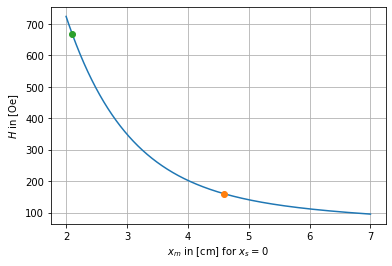

In [81]:
H_fun = lambdify((x, x_m),4152*exp(-0.99*(x_m-x)) + 184.5*exp(-0.1*(x_m-x)),'numpy')
x_m_vals = np.arange(7, 2 ,-0.001)
H_vals = H_fun(0,x_m_vals)


#H_fun = lambdify((x),4152*exp(-0.99*(x)) + 184.5*exp(-0.1*(x)),'numpy')
#x_vals = np.arange(0, 4 ,0.001)
#H_vals = H_fun(x_vals)
#plt.plot(x_vals, H_vals)

plt.plot(x_m_vals, H_vals)
plt.plot(4.6, H_fun(0,4.6), '.', markersize = 12)
plt.plot(2.1, H_fun(0,2.1), '.', markersize = 12)
plt.ylabel('$H$ in [Oe]')
plt.xlabel('$x_m$ in [cm] for $x_s = 0$')
plt.grid()

## Equation (1)

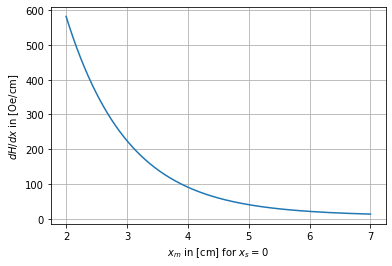

In [100]:
dH_fun = lambdify((x, x_m),diff(4152*exp(-0.99*(x_m-x)) + 184.5*exp(-0.1*(x_m-x)),x),'numpy')
dH_vals = dH_fun(0, x_m_vals)
plt.plot(x_m_vals, dH_vals)
plt.ylabel('$d H/dx$ in [Oe/cm]')
plt.xlabel('$x_m$ in [cm] for $x_s = 0$')
plt.grid()

## Equation (5)

In [84]:
xi = m* H_vals / (k*T)
M_f = M_fS * (np.cosh(xi)/np.sinh(xi) - xi**(-1))

For equation (2) $M_b(H_S)$ is requiered as well, but there is no information about it, besides $\mu_b = 1$.
Looking into a text book:

- $\vec{M} = (\mu - 1) \cdot \vec{H}$

In [101]:
M_b = (mu_b - 1) * H_fun(0,x_m_vals)

In [102]:
F_mI = - VIB*(M_b-M_f)*dH_vals *  1e-5
F_mII = - VIIB*(M_b-M_f)*dH_vals *  1e-5

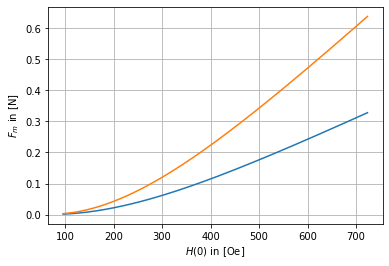

In [103]:
plt.plot(H_vals, F_mI)
plt.plot(H_vals, F_mII)
plt.xlabel('$H(0)$ in [Oe]')
plt.ylabel('$F_m$ in [N]')
plt.grid()